In [1]:
# Reproject and resample the EASE v1 grid into the EASE v2 grid

import xarray
import rioxarray

v1_path = r"../data\raw\AMSRU_Mland_2017001A.tif"
v2_path = r"../data\raw\ka_36ghz\Ascending\GW1AM2_20170101_01D_EQMA_L3SGT36LA2220220_corrected.h5"


In [2]:
# Load the files:
v1_data = rioxarray.open_rasterio(v1_path, masked=True)
v2_data = xarray.open_dataset(v2_path)

# Apply the v2 data scaling factors:
for dvar in v2_data.data_vars:
    v2_data[dvar] *= v2_data[dvar].attrs["SCALE FACTOR"]

v1_data.sizes, v2_data.sizes


(Frozen({'band': 7, 'y': 586, 'x': 1383}), Frozen({'lon': 1388, 'lat': 584}))

In [3]:
""" 
In theory, v1 is EPSG:3410 and v2 is EPSG:6933
"""
v1_data.rio.crs, v2_data.rio.crs

(CRS.from_epsg(3410), None)

Frozen({'band': 7, 'y': 584, 'x': 1388})


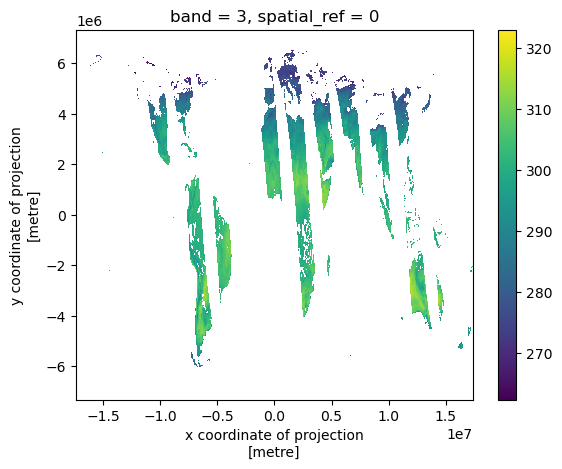

In [4]:
# Reproject and resample v1 data into v2
v1_land = v1_data.where(v1_data>-999) # Remove missing data
rv1_data = v1_land.rio.reproject("EPSG:6933", shape = v2_data["Brightness Temperature (H)"].shape)
rv1_data.sel(band=3).plot()
print(rv1_data.sizes)

In [61]:
# In order to compare, we need to get the projected x,y dimensions in the v2 data
from pyproj import Proj, transform
import numpy as np
# Define the EPSG codes for the source (WGS84) and target (EPSG:6933) coordinate systems
source_proj = Proj(init='epsg:4326')  # WGS84
target_proj = Proj(init='epsg:6933')  # EPSG:6933

# Your latitude and longitude coordinates
lats = v2_data.lat.values
lons = v2_data.lon.values

latarr,lonarr = np.meshgrid(lats,lons)

# Convert latitude and longitude to projected coordinates
x_coords, y_coords = transform(source_proj, target_proj, lonarr, latarr)

c:\Users\andre\Desktop\VS_Code\PMW_LST\.conda\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\andre\Desktop\VS_Code\PMW_LST\.conda\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\andre\AppData\Local\Temp\ipykernel_16900\2656198596.py:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgradin

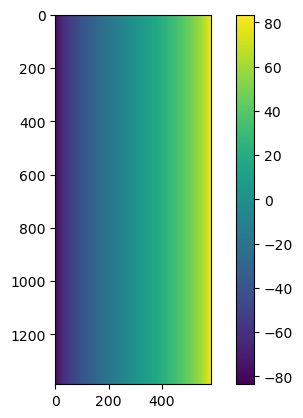

In [62]:
import matplotlib.pyplot as plt
plt.imshow(latarr)
plt.colorbar()

In [63]:
# Add x and y projection coordinates as variables
v2_data["x"] = (("lon",),x_coords[:,0])
v2_data["y"] = (("lat",),y_coords[0,:])


# Now set the new coordinates and csr:
v2_data.rio.write_crs("EPSG:6933")

v2_data = v2_data.assign_coords(
    {
        "x":v2_data.x,
        "y":v2_data.y
    },
)

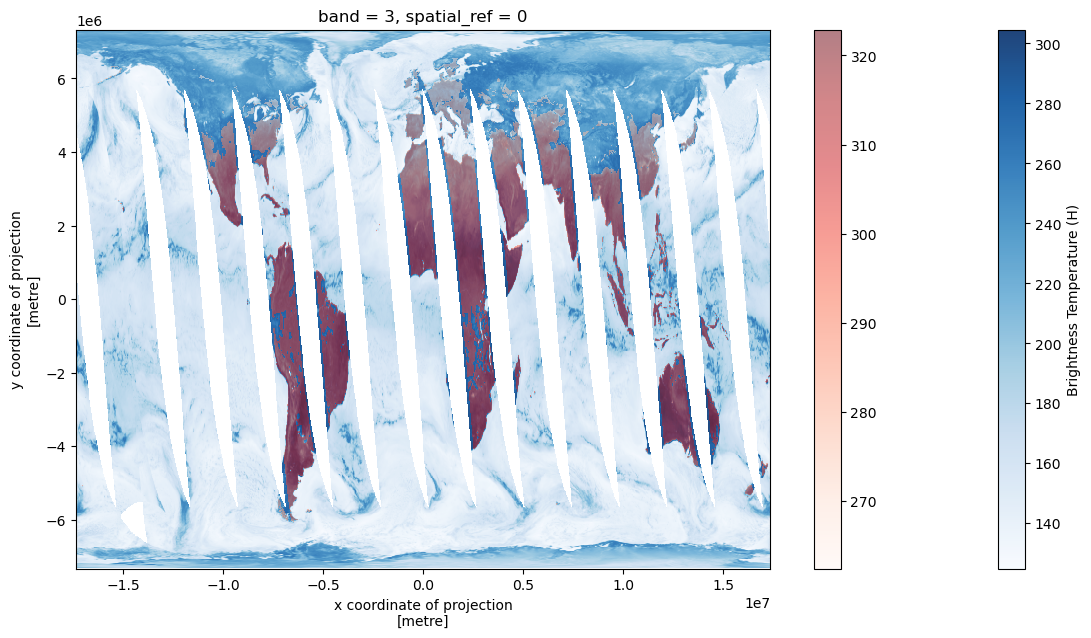

In [64]:
import matplotlib.patches as patches
fig, ax = plt.subplots(1,1,figsize=(14,7))
v2_data["Brightness Temperature (H)"].plot(x="x",y="y", ax=ax, cmap="Blues", alpha=0.9)
rv1_data.sel(band=3).plot(cmap="Reds",alpha=0.5, ax=ax)

rectangles = []
# TODO:  Set the same color range

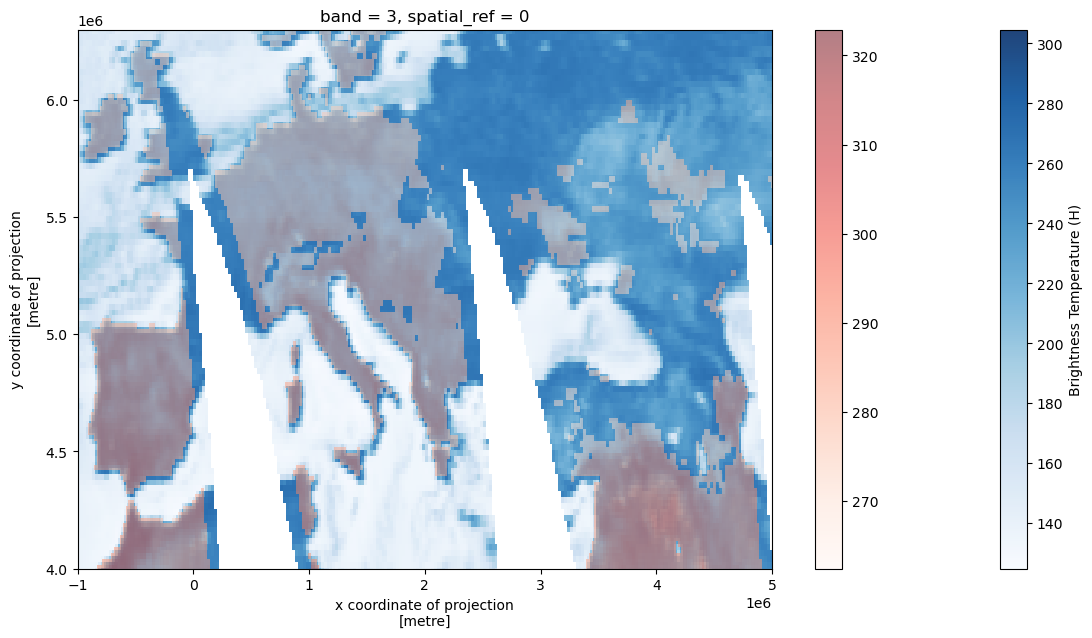

In [65]:
# Zoom into a region to check if the matching is correct:
fig, ax = plt.subplots(1,1,figsize=(14,7))
v2_data["Brightness Temperature (H)"].plot(x="x",y="y", ax=ax, cmap="Blues", alpha=0.9)
rv1_data.sel(band=3).plot(cmap="Reds",alpha=0.5, ax=ax)

x_lims = (-0.1*10**7, 0.5*10**7)
y_lims = (4*10**6, 6.3*10**6)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])

rect_width = x_lims[1] - x_lims[0]
rect_height = y_lims[1] - y_lims[0]
rect_x = x_lims[0]
rect_y = y_lims[0]

rectangles.append(patches.Rectangle((rect_x, rect_y), rect_width, rect_height, linewidth=1, edgecolor='r', facecolor='none'))

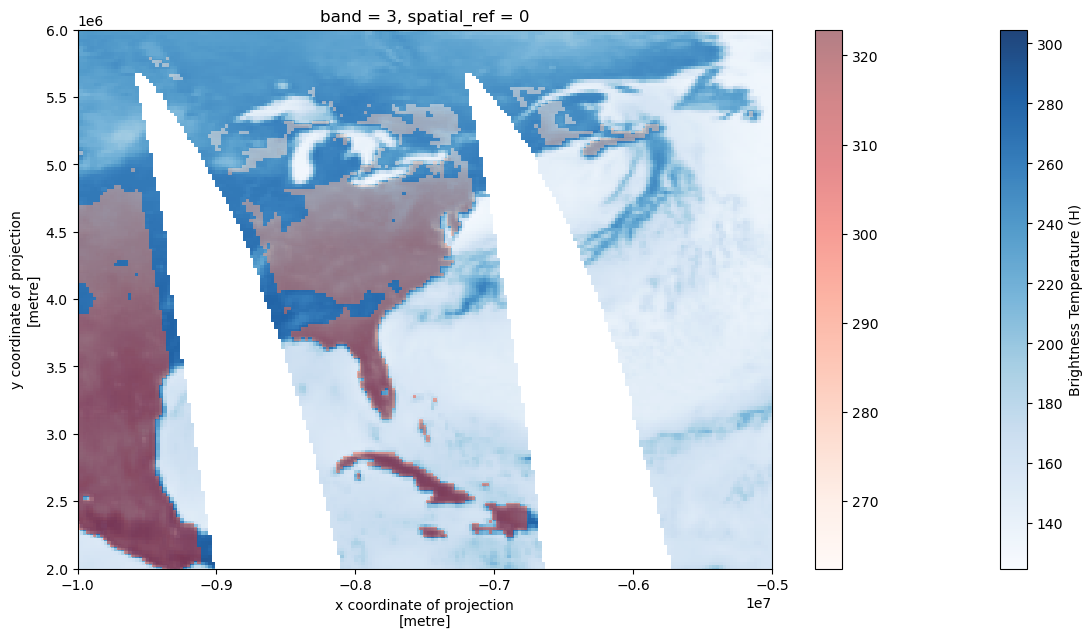

In [66]:
# Zoom into a region to check if the matching is correct:
fig, ax = plt.subplots(1,1,figsize=(14,7))
v2_data["Brightness Temperature (H)"].plot(x="x",y="y", ax=ax, cmap="Blues", alpha=0.9)
rv1_data.sel(band=3).plot(cmap="Reds",alpha=0.5, ax=ax)

x_lims = (-1*10**7, -0.5*10**7)
y_lims = (2*10**6, 6*10**6)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])

rect_width = x_lims[1] - x_lims[0]
rect_height = y_lims[1] - y_lims[0]
rect_x = x_lims[0]
rect_y = y_lims[0]

rectangles.append(patches.Rectangle((rect_x, rect_y), rect_width, rect_height, linewidth=1, edgecolor='r', facecolor='none'))

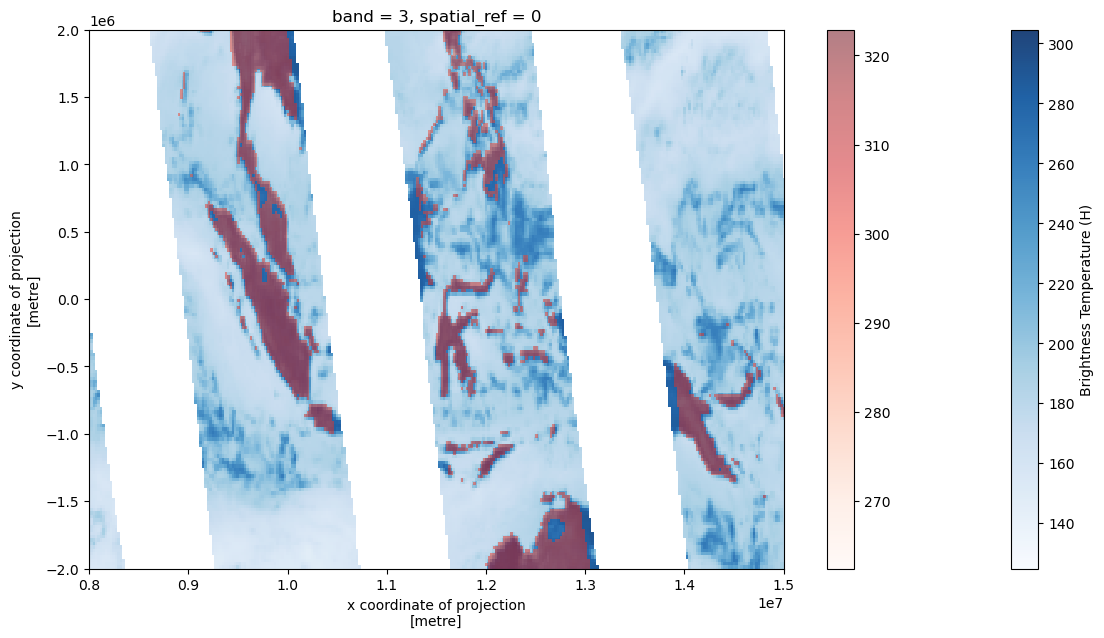

In [67]:
# Zoom into a region to check if the matching is correct:
fig, ax = plt.subplots(1,1,figsize=(14,7))
v2_data["Brightness Temperature (H)"].plot(x="x",y="y", ax=ax, cmap="Blues", alpha=0.9)
rv1_data.sel(band=3).plot(cmap="Reds",alpha=0.5, ax=ax)

x_lims = (0.8*10**7, 1.5*10**7)
y_lims = (-2*10**6, 2*10**6)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])

rect_width = x_lims[1] - x_lims[0]
rect_height = y_lims[1] - y_lims[0]
rect_x = x_lims[0]
rect_y = y_lims[0]

rectangles.append(patches.Rectangle((rect_x, rect_y), rect_width, rect_height, linewidth=1, edgecolor='r', facecolor='none'))

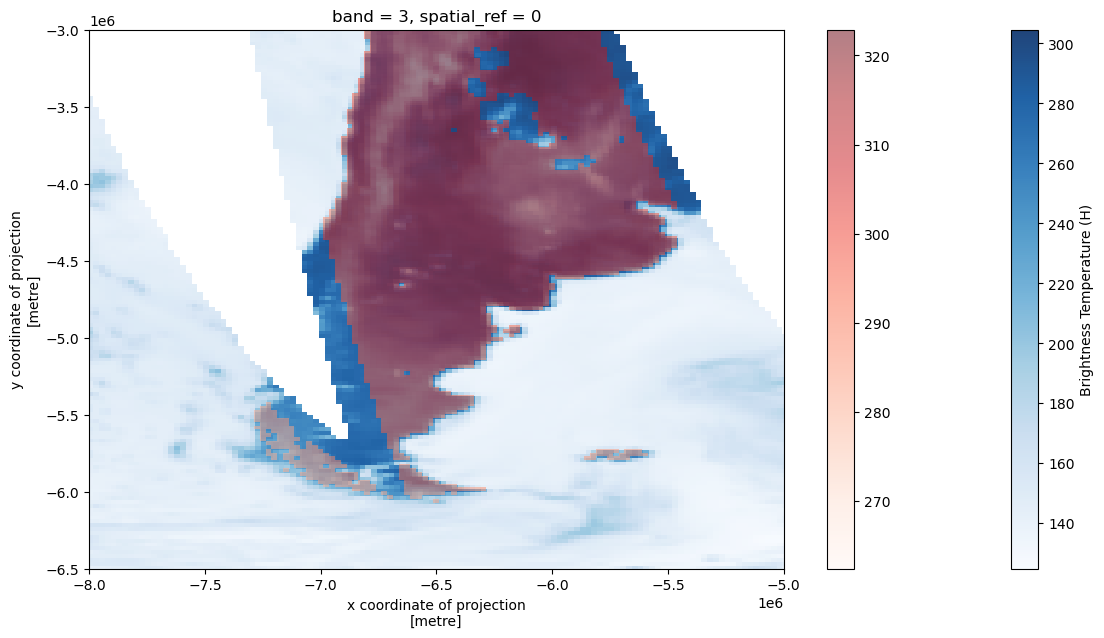

In [68]:
# Zoom into a region to check if the matching is correct:
fig, ax = plt.subplots(1,1,figsize=(14,7))
v2_data["Brightness Temperature (H)"].plot(x="x",y="y", ax=ax, cmap="Blues", alpha=0.9)
rv1_data.sel(band=3).plot(cmap="Reds",alpha=0.5, ax=ax)

x_lims = (-0.8*10**7, -0.5*10**7)
y_lims = (-6.5*10**6, -3*10**6)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])

rect_width = x_lims[1] - x_lims[0]
rect_height = y_lims[1] - y_lims[0]
rect_x = x_lims[0]
rect_y = y_lims[0]

rectangles.append(patches.Rectangle((rect_x, rect_y), rect_width, rect_height, linewidth=1, edgecolor='r', facecolor='none'))

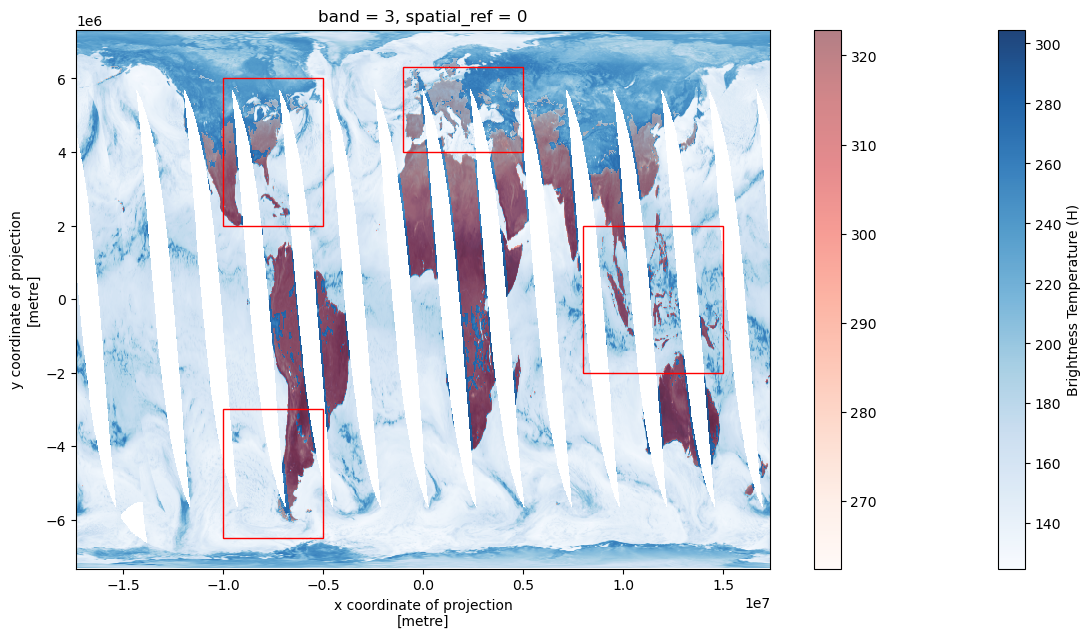

In [172]:
fig, ax = plt.subplots(1,1,figsize=(14,7))
v2_data["Brightness Temperature (H)"].plot(x="x",y="y", ax=ax, cmap="Blues", alpha=0.9)
rv1_data.sel(band=3).plot(cmap="Reds",alpha=0.5, ax=ax)


for rectangle in rectangles:
    ax.add_patch(rectangle)

---
## 

Lets try to reproject the data from a file and then plot the xy and x'y' coordinates into the same scatterplot to see if we are missing anything. 

In [7]:
#
rv1_data.sizes, v1_data.sizes

(Frozen({'band': 7, 'y': 584, 'x': 1388}),
 Frozen({'band': 7, 'y': 586, 'x': 1383}))

In [90]:
# Extract the projected coordiantes as points. Do a meshgrid with x and y
X1, Y1 = np.meshgrid(rv1_data.x.values, rv1_data.y.values)
X1 = X1.flatten()
Y1 = Y1.flatten()

(-6000000.0, -7000000.0)

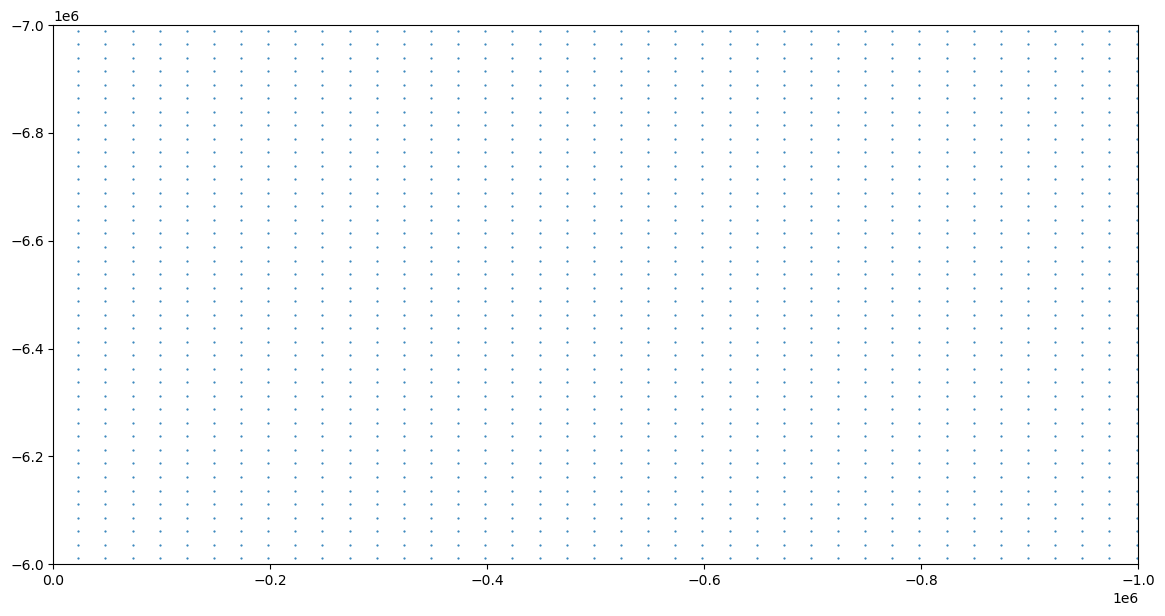

In [91]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(14,7))
ax.scatter(X1,Y1,s=0.3)

x_lims = (-0*10**7, -0.1*10**7)
y_lims = (-6*10**6, -7*10**6)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])

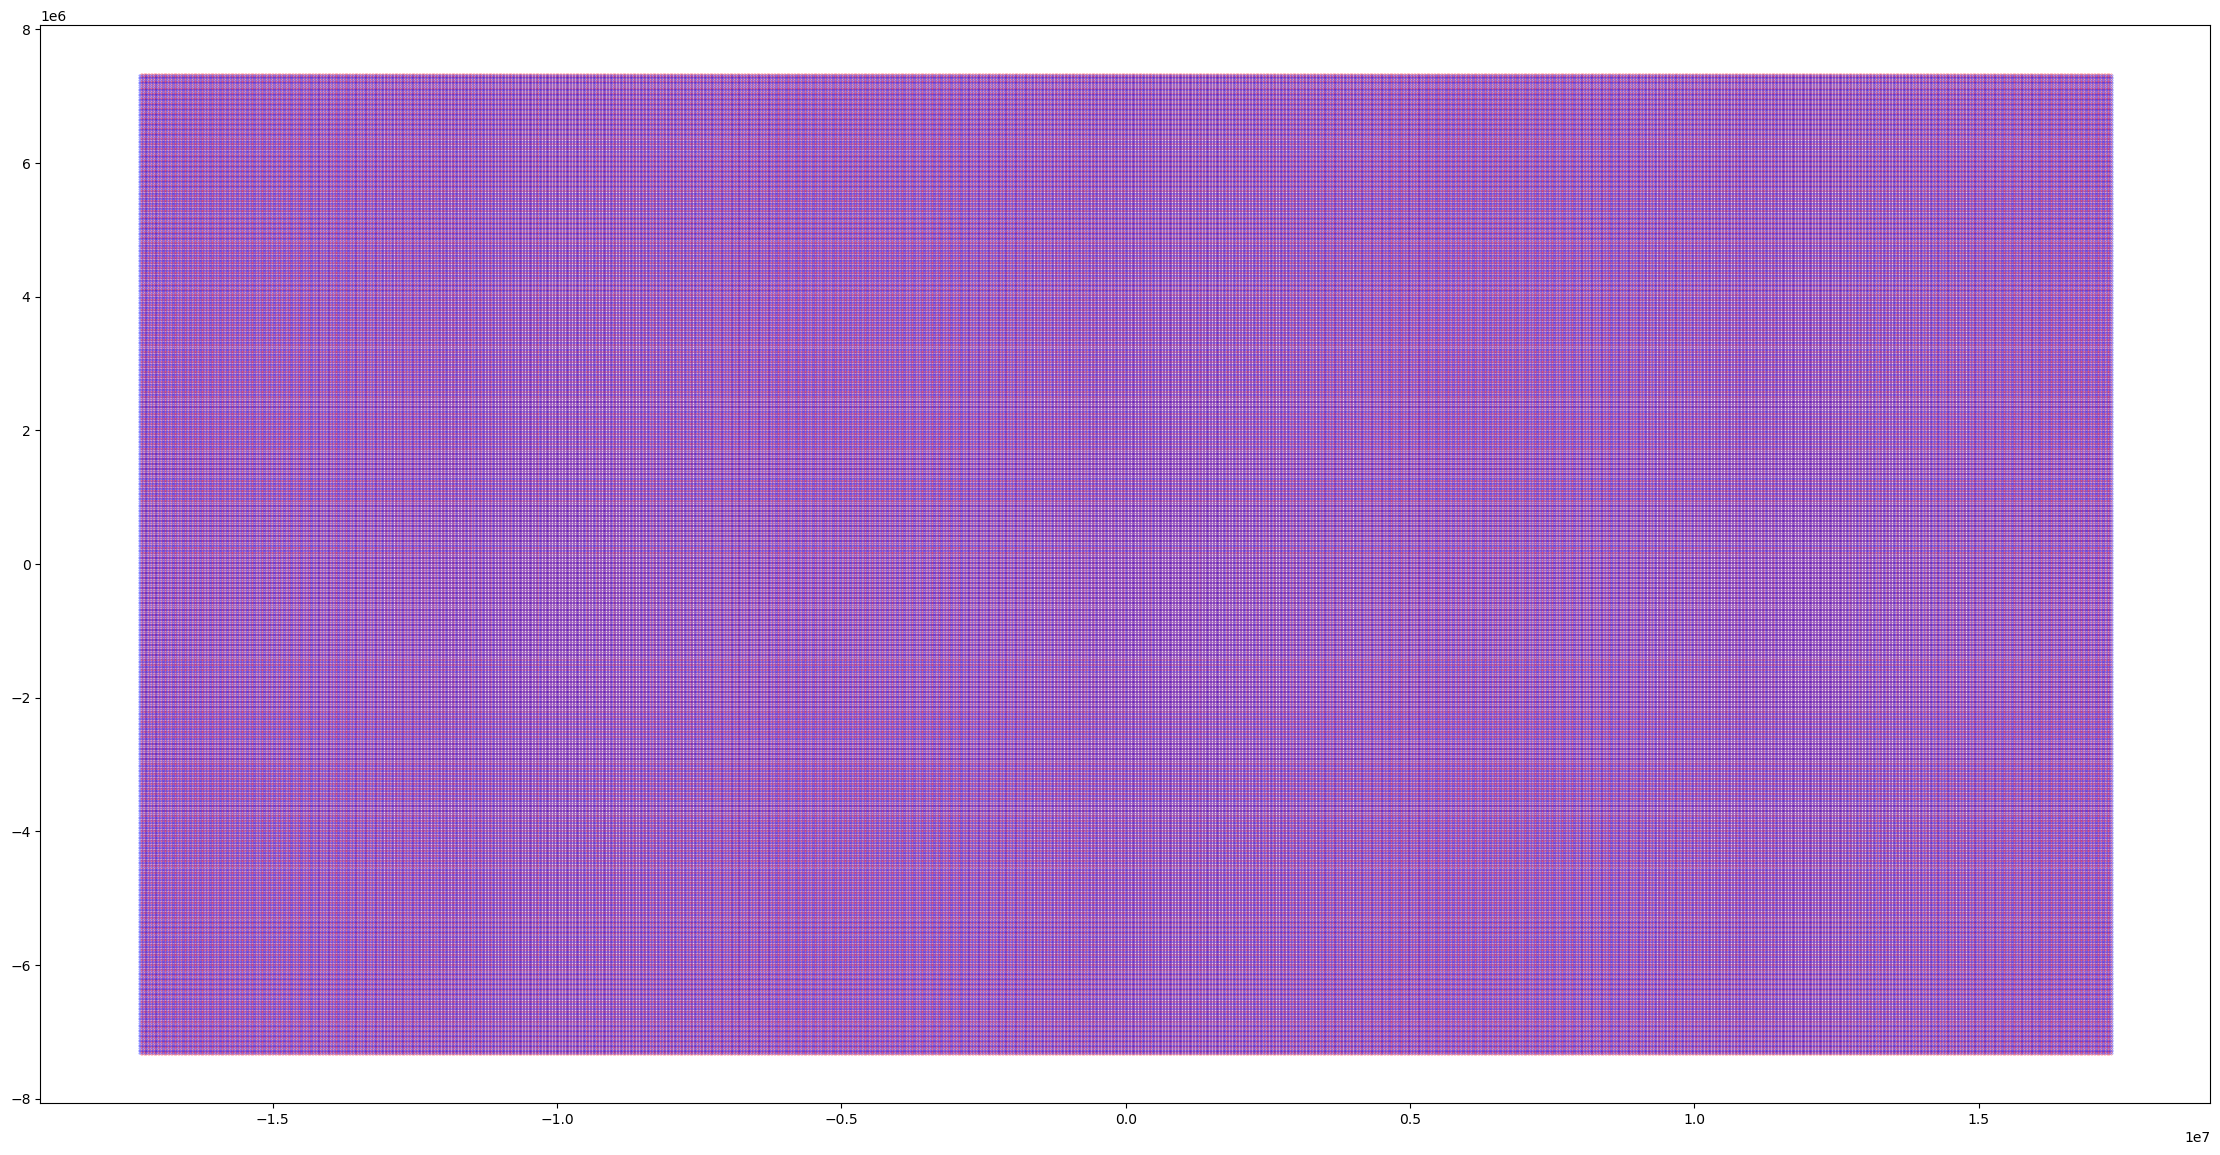

In [290]:
# Do the same with the original V1 coordiantes

X2, Y2 = np.meshgrid(v1_data.x.values, v1_data.y.values)
X2 = X2.flatten()
Y2 = Y2.flatten()

fig,ax = plt.subplots(1,1,figsize=(28,14))
ax.scatter(X2,Y2,s=0.1, color="Red", alpha=0.5)

#
ax.scatter(X1,Y1,s=0.1,color = "Blue", alpha=0.5)

# x_lims = (-0*10**7, -0.1*10**7)
# y_lims = (-6*10**6, -7*10**6)

# ax.set_xlim(x_lims[0], x_lims[1])
# ax.set_ylim(y_lims[0], y_lims[1])

(1000000.0, 2000000.0)

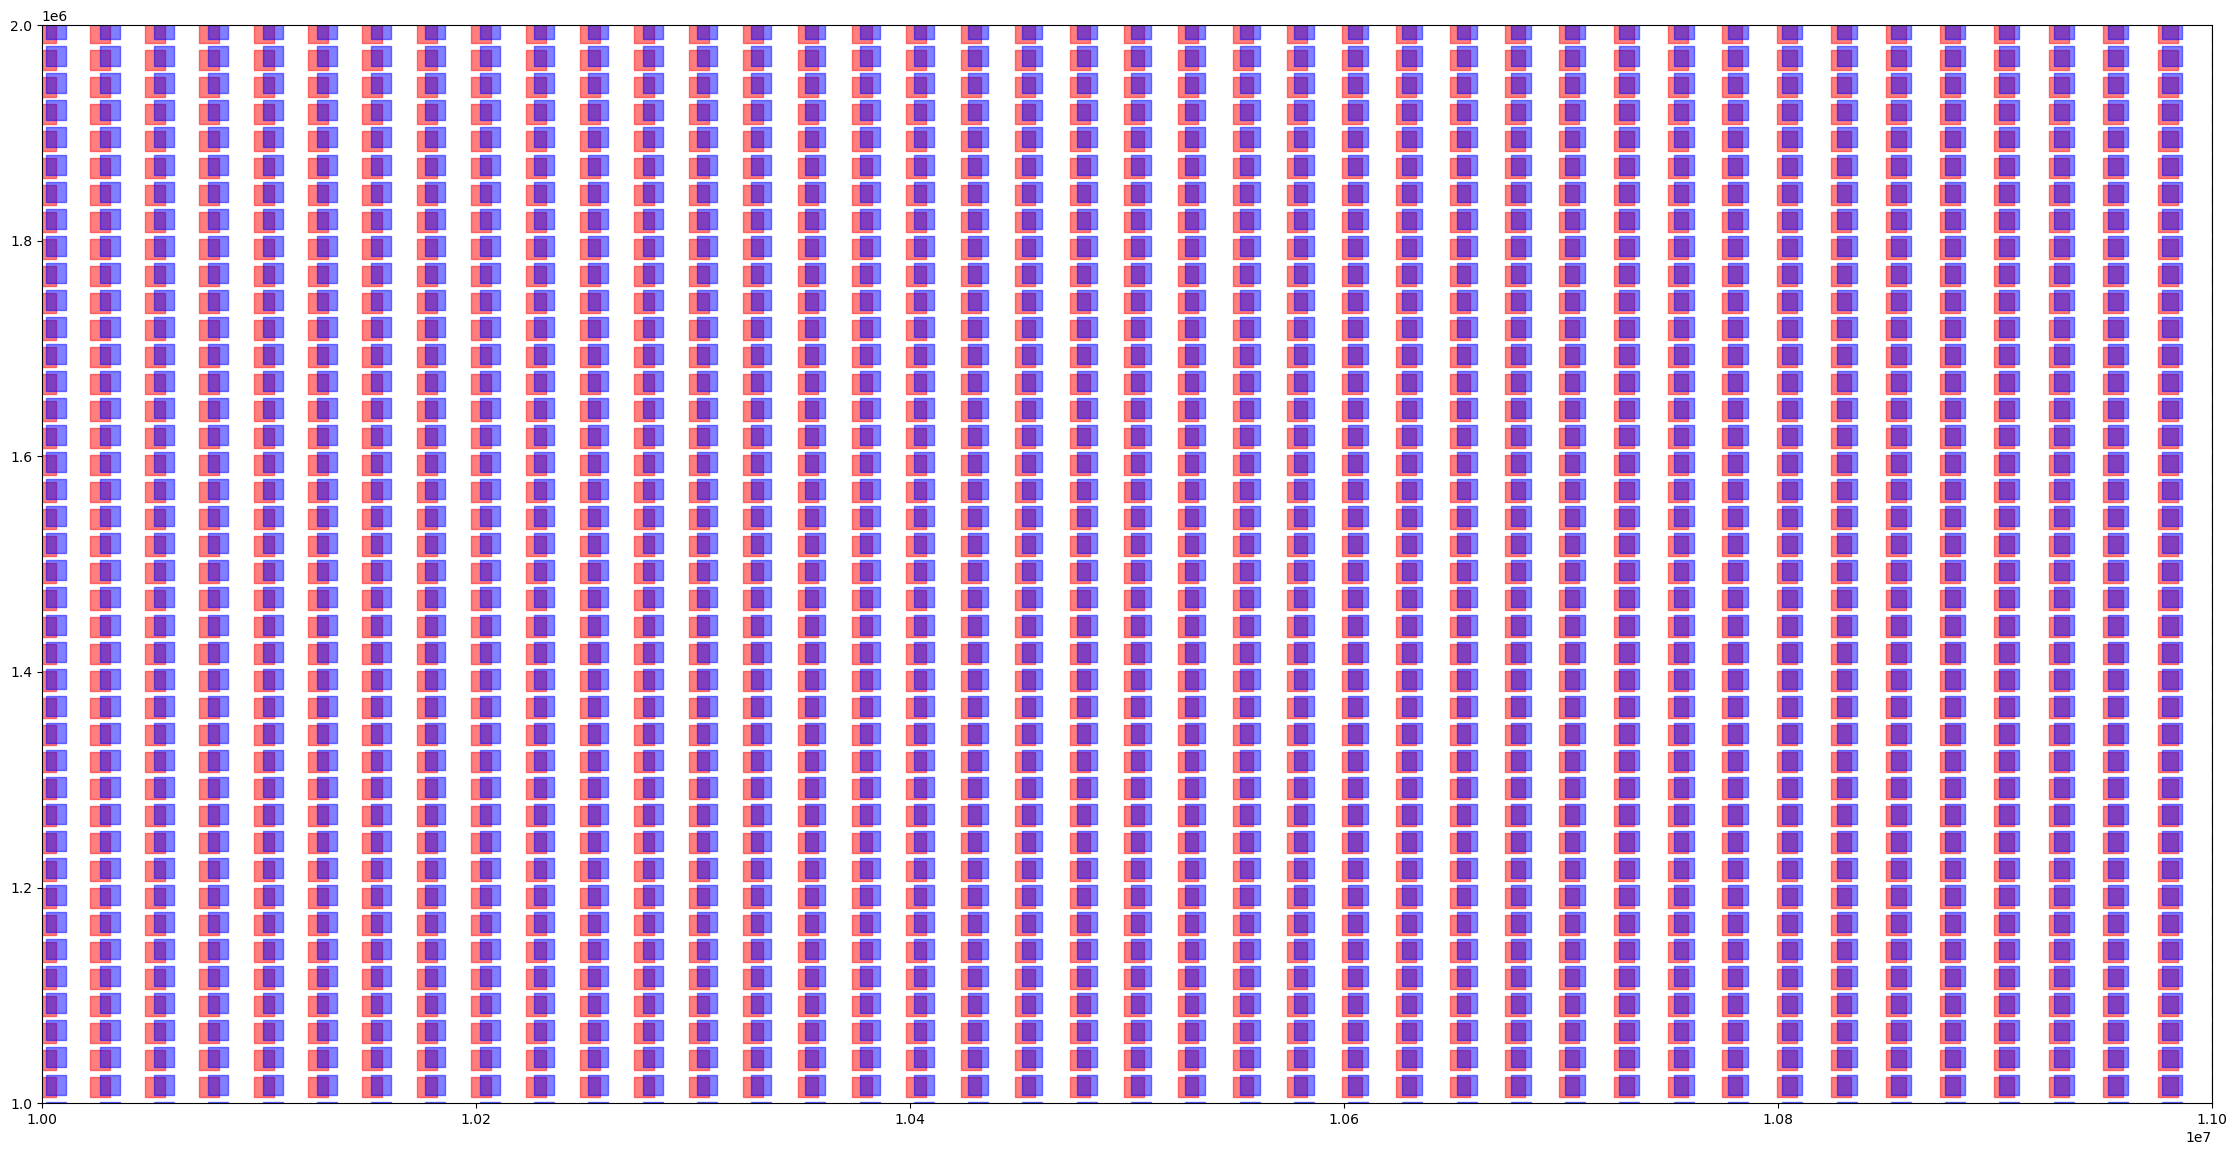

In [93]:
# Change the limits and size to see
X2, Y2 = np.meshgrid(v1_data.x.values, v1_data.y.values)
X2 = X2.flatten()
Y2 = Y2.flatten()

fig,ax = plt.subplots(1,1,figsize=(28,14))
ax.scatter(X2,Y2,s=200, color="Red", alpha=0.5, marker = 's')

#
ax.scatter(X1,Y1,s=200,color = "Blue", alpha=0.5, marker = 's')

x_lims = (1*10**7, 1.1*10**7)
y_lims = (1*10**6, 2*10**6)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])

---
Do the same and compare the data pixels only

(-6500000.0, -3000000.0)

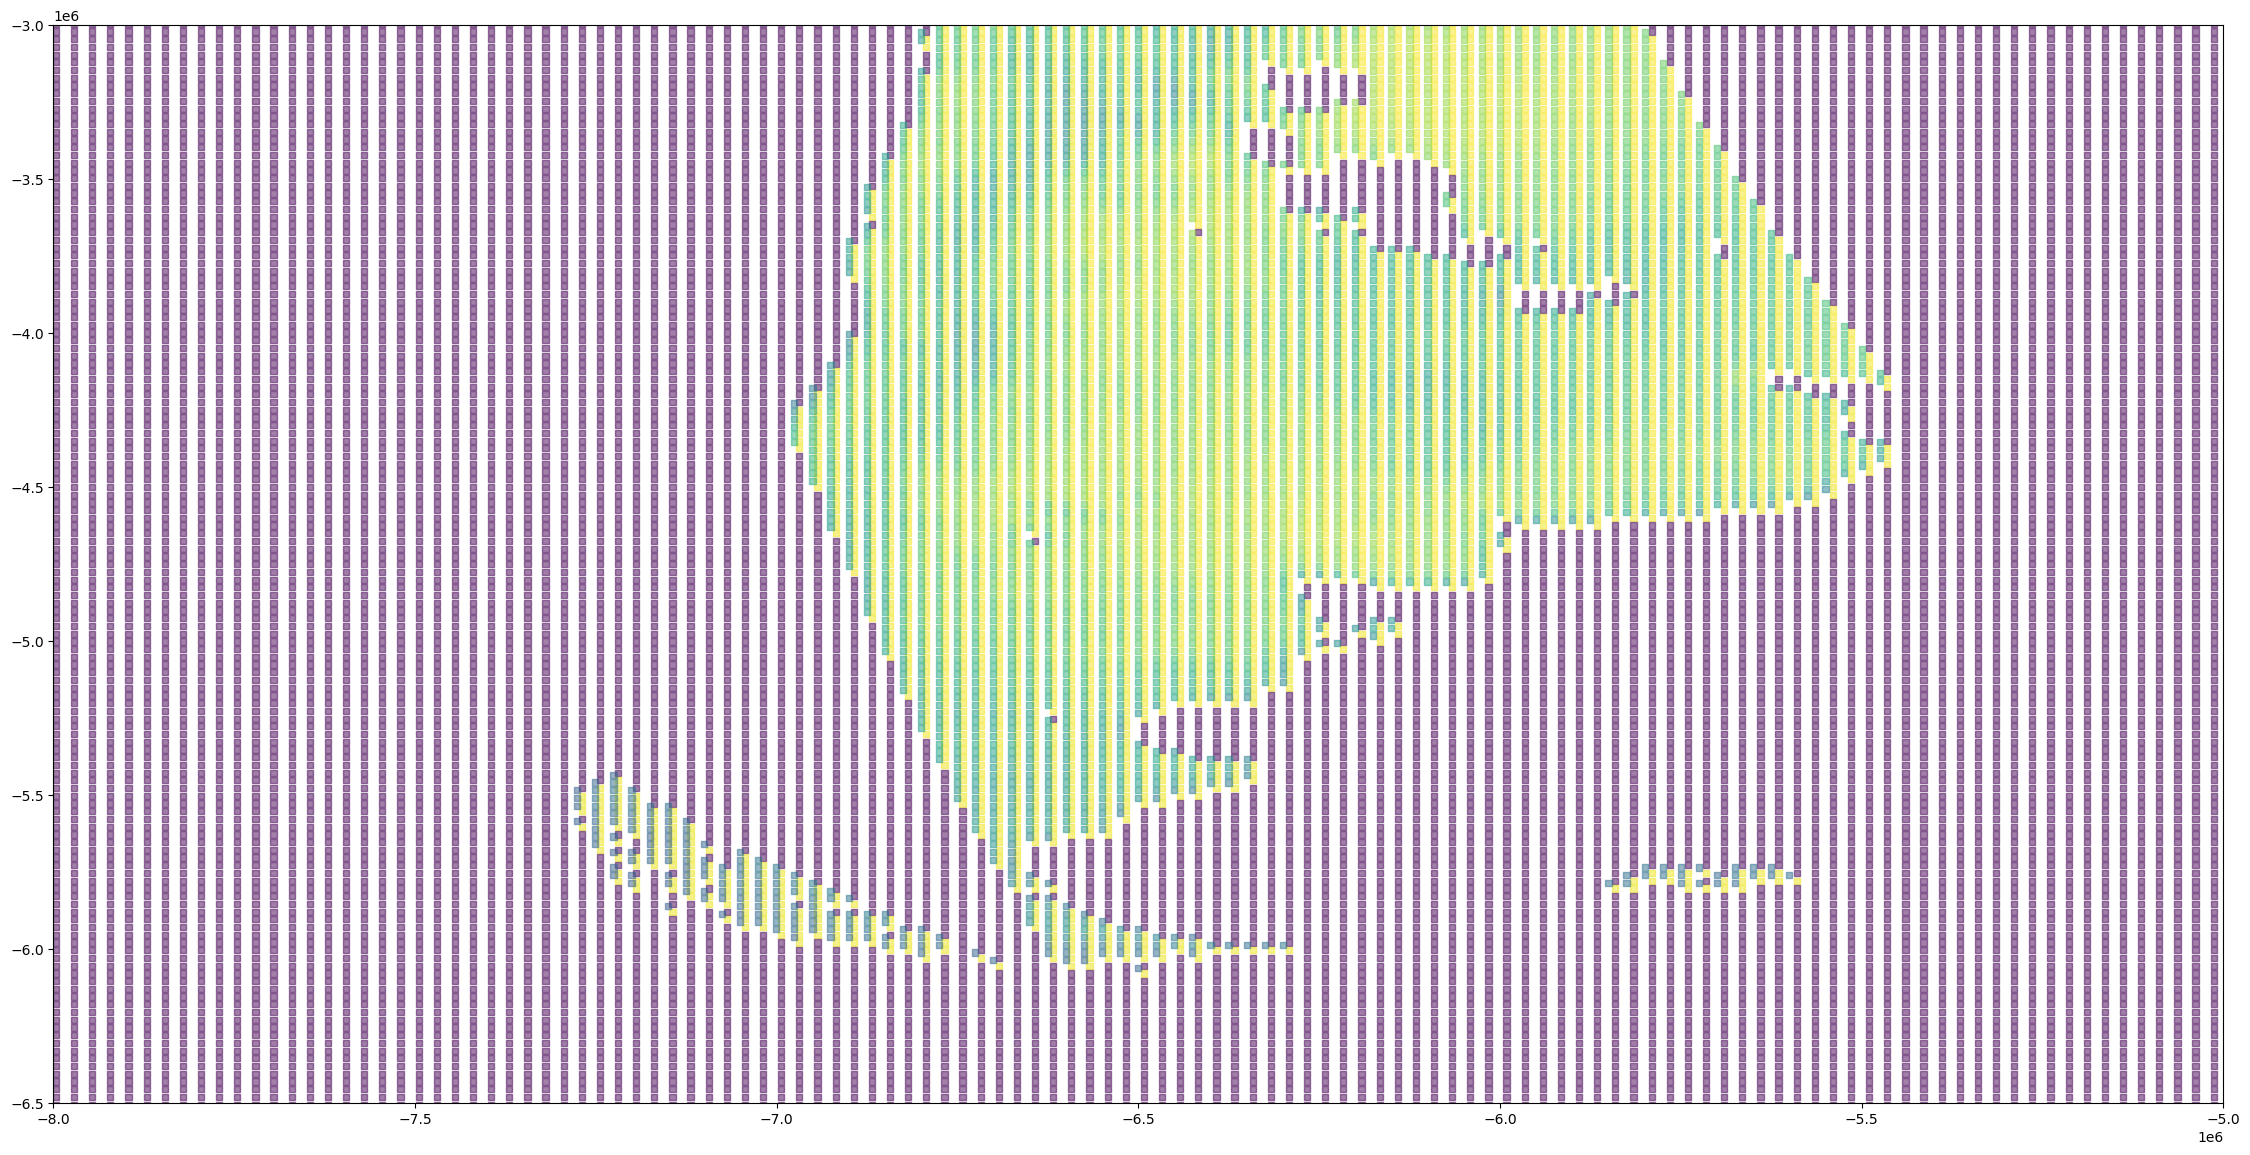

In [212]:
fig,ax = plt.subplots(1,1,figsize=(28,14))
ax.scatter(X2,Y2,s=20, c=v1_data.sel(band=3), alpha=0.5, marker = 's')

#
ax.scatter(X1,Y1,s=20,c=rv1_data.sel(band=3), alpha=0.5, marker = 's')

x_lims = (-0.8*10**7, -0.5*10**7)
y_lims = (-6.5*10**6, -3*10**6)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])

(-6400000.0, -3000000.0)

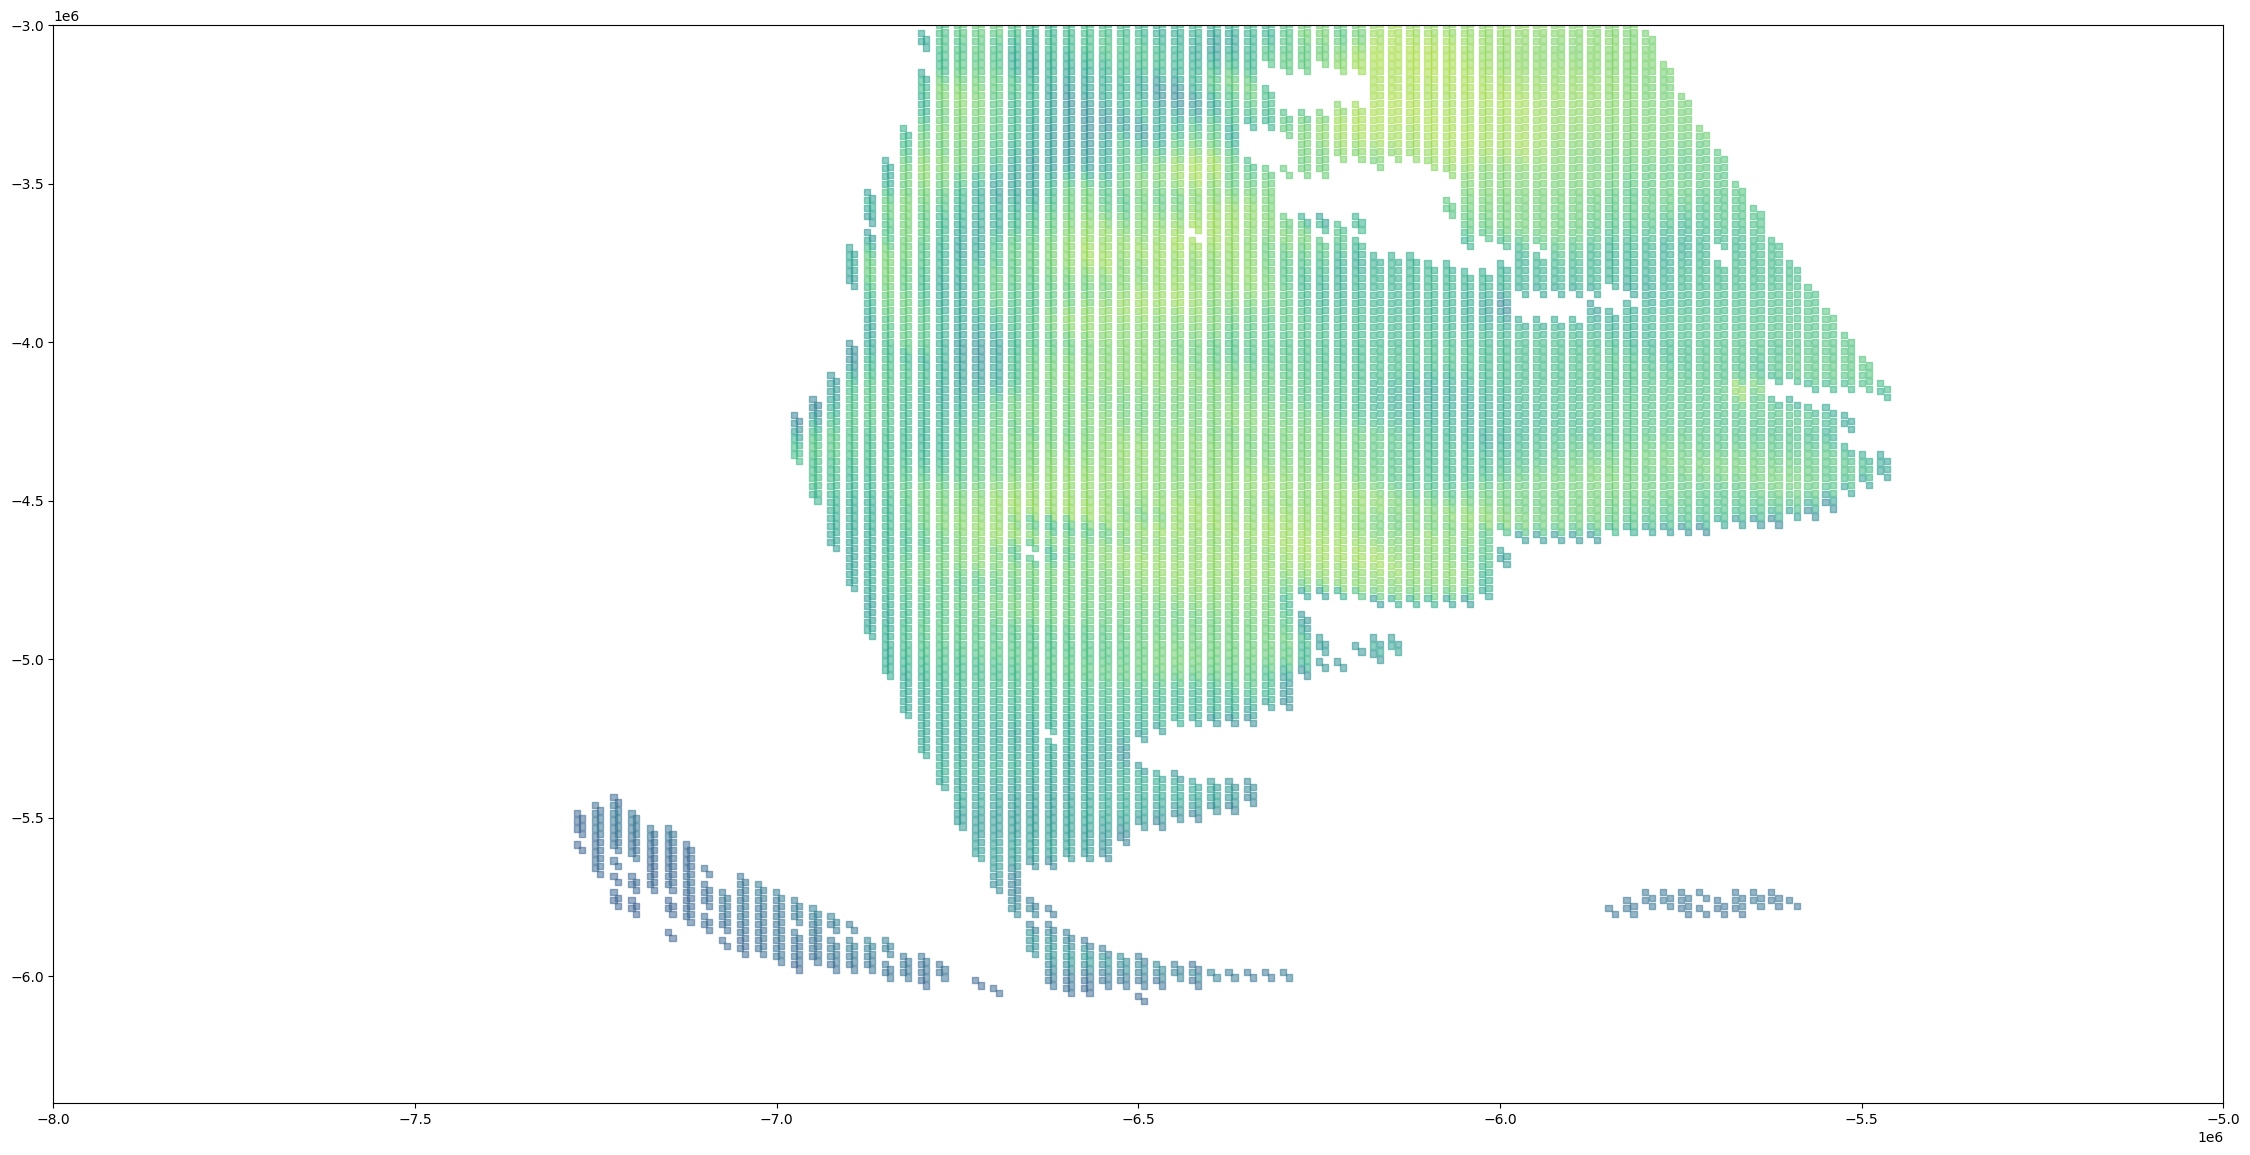

In [87]:
fig,ax = plt.subplots(1,1,figsize=(28,14))
ax.scatter(X2,Y2,s=20, c=v1_land.sel(band=3), alpha=0.5, marker = 's')

#
ax.scatter(X1,Y1,s=20,c=rv1_data.sel(band=3), alpha=0.5, marker = 's')

x_lims = (-0.8*10**7, -0.5*10**7)
y_lims = (-6.4*10**6, -3*10**6)

ax.set_xlim(x_lims[0], x_lims[1])
ax.set_ylim(y_lims[0], y_lims[1])

 --- 

 My Proposal for reprojecting V1 into V2 data

Frozen({'band': 7, 'y': 584, 'x': 1388})


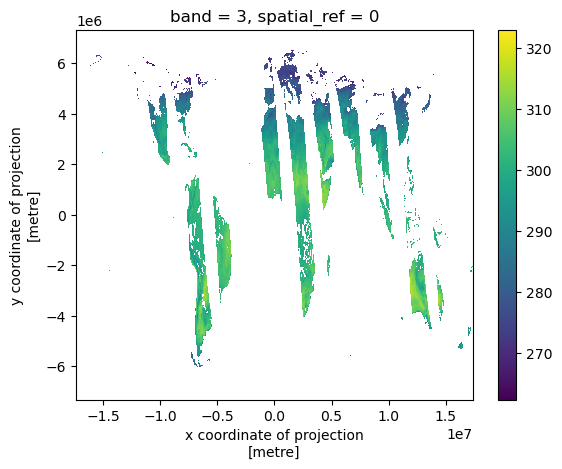

In [115]:
import xarray
import rioxarray
from pyproj import Proj, transform

# Open the .tif file with the AMRS EASEv1 data
v1_path = r"../data\raw\AMSRU_Mland_2017001A.tif"
v1_data = rioxarray.open_rasterio(v1_path, masked=True)

# Reproject and resample v1 data into v2
v1_land = v1_data.where(v1_data>-999) # Remove missing data for the ocean (optional)

rv1_data = v1_land.rio.reproject("EPSG:6933", shape =(584, 1388)) # EASE v2 is EPSG:6933 and with a res of 25km will have this shape over the whole globe
rv1_data.sel(band=3).plot()
print(rv1_data.sizes)


In [116]:
""" 
In order for this to work the dataset must have the x-y coordinates of the projection (in meters).
Also, if we read the dataset from a .nc or .h5 file we must tell rioxarray what the original projection is
"""
v1_data

<xarray.DataArray (band: 7, y: 586, x: 1383)>
array([[[-999., -999., ..., -999., -999.],
        [-999., -999., ..., -999., -999.],
        ...,
        [-999., -999., ..., -999., -999.],
        [-999., -999., ..., -999., -999.]],

       [[-999., -999., ..., -999., -999.],
        [-999., -999., ..., -999., -999.],
        ...,
        [-999., -999., ..., -999., -999.],
        [-999., -999., ..., -999., -999.]],

       ...,

       [[-999., -999., ..., -999., -999.],
        [-999., -999., ..., -999., -999.],
        ...,
        [-999., -999., ..., -999., -999.],
        [-999., -999., ..., -999., -999.]],

       [[-999., -999., ..., -999., -999.],
        [-999., -999., ..., -999., -999.],
        ...,
        [-999., -999., ..., -999., -999.],
        [-999., -999., ..., -999., -999.]]], dtype=float32)
Coordinates:
  * band         (band) int32 1 2 3 4 5 6 7
  * x            (x) float64 -1.732e+07 -1.73e+07 ... 1.73e+07 1.732e+07
  * y            (y) float64 7.332e+06 7.307e+06 ... -7.307e+06 -7.332e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:             Area
    TIFFTAG_DATETIME:          2021:03:16 22:21:13
    TIFFTAG_DOCUMENTNAME:      Y:/data/LPDR_v2/GeoTIFF/2017/AMSRU_Mland_20170...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    TIFFTAG_SOFTWARE:          IDL 8.7.2, Harris Geospatial Solutions, Inc.
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    scale_factor:              1.0
    add_offset:                0.0

In [286]:
# in case we load a EASEv1 datase with no XY coords and not spatial_ref we can add them as follows:
path= r"..\data\raw\ka_36ghz\Ascending\GW1AM2_20170101_01D_EQMA_L3SGT36LA2220220_corrected.h5"
ds = xarray.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:                     (lon: 1388, lat: 584)
Coordinates:
  * lon                         (lon) float32 -179.9 -179.6 ... 179.6 179.9
  * lat                         (lat) float32 -83.52 -81.98 ... 81.98 83.52
Data variables:
    Brightness Temperature (H)  (lat, lon) float32 ...
    Brightness Temperature (V)  (lat, lon) float32 ...
    Time Information            (lat, lon) float32 ...
Attributes: (12/28)
    CDI:                       Climate Data Interface version 1.9.9 (https://...
    Conventions:               CF-1.6
    ProductName:               AMSR2-L3
    GeophysicalName:           Brightness Temperature (36GHz)
    MeanType:                  DayMean
    Projection:                EQR
    ...                        ...
    OrbitDirection:            Ascending
    PlatformShortName:         GCOM-W1
    SensorShortName:           AMSR2
    ECSDataModel:              B.0
    history:                   Tue Apr 27 13:13:52 2021: cdo remapbil,/media/...
    CDO:                       Climate Data Operators version 1.9.9 (https://...

In [287]:
# Add the spacial reference:
ds.rio.write_crs("EPSG:3140",inplace=True)

# Calculate the XY coordinates of the projection from lat-lon (WSG84 Equirectangular)

# Define the EPSG codes for the source (WGS84) and target (EPSG:3140) coordinate systems
source_proj = Proj(init='epsg:4326')  # WGS84
target_proj = Proj(init='epsg:3140')  # EASEv1

# Your latitude and longitude coordinates
lats = ds.lat.values 
lons =  ds.lon.values 

latarr,lonarr = np.meshgrid(lats,lons)

# Convert latitude and longitude to projected coordinates

# TODO: resolve this deprecation issue, using pyproj.transformer class instead
x_coords, y_coords = transform(source_proj, target_proj, lonarr, latarr)

# Add the coordinates to the dataset as 'x' and 'y'

# Add x and y projection coordinates as variables (name the dimensions, in this case longitude_grid and latitude_grid)
ds["x"] = (("lon",),x_coords[:,0])
ds["y"] = (("lat",),y_coords[0,:])

# Now set the new coordinates and csr of EASE v1:
ds.rio.write_crs("epsg:3140", inplace=True)
# Swap the coordinaes to be XY instead of lat, lon
rds = ds.swap_dims(
    {
        "lat": "y",
        "lon": "x"
    }
)
# keep the lat and lon as dvars during the trasnformation
rds = rds.reset_coords(names=["lat","lon"])

# Now we can use rioxarray to change to the XY coords from EASEv1 25km to change into the EASEv2 25km grid.
rds = rds.rio.reproject("EPSG:6933", shape=(586,1388)) # Code and shape of the desired projection

# Reset lon lat to be coordinates after
rds = rds.set_coords(["lat","lon"])
rds

c:\Users\andre\Desktop\VS_Code\PMW_LST\.conda\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\andre\Desktop\VS_Code\PMW_LST\.conda\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\andre\AppData\Local\Temp\ipykernel_16900\297903147.py:19: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading

<xarray.Dataset>
Dimensions:                     (x: 1388, y: 584)
Coordinates:
  * x                           (x) float64 6.794e+05 6.957e+05 ... 6.632e+05
  * y                           (y) float64 -3.552e+07 -3.467e+07 ... 5.672e+07
    spatial_ref                 int32 0
    lon                         (x) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
    lat                         (y) float32 -83.52 -81.98 -80.7 ... 81.98 83.52
Data variables:
    Brightness Temperature (H)  (y, x) float32 nan nan nan nan ... nan nan nan
    Brightness Temperature (V)  (y, x) float32 nan nan nan nan ... nan nan nan
    Time Information            (y, x) float32 nan nan nan nan ... nan nan nan
Attributes: (12/28)
    CDI:                       Climate Data Interface version 1.9.9 (https://...
    Conventions:               CF-1.6
    ProductName:               AMSR2-L3
    GeophysicalName:           Brightness Temperature (36GHz)
    MeanType:                  DayMean
    Projection:                EQR
    ...                        ...
    OrbitDirection:            Ascending
    PlatformShortName:         GCOM-W1
    SensorShortName:           AMSR2
    ECSDataModel:              B.0
    history:                   Tue Apr 27 13:13:52 2021: cdo remapbil,/media/...
    CDO:                       Climate Data Operators version 1.9.9 (https://...

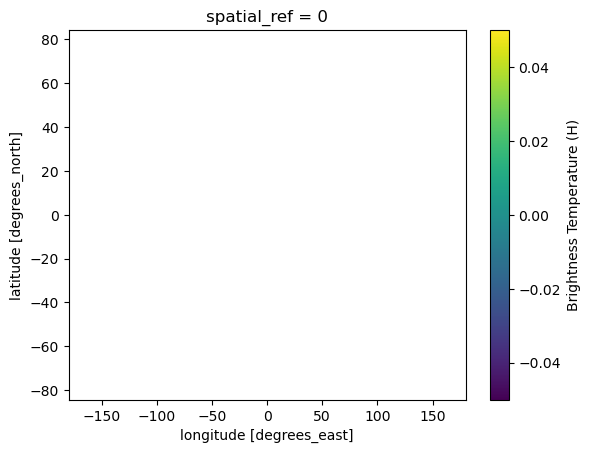

In [288]:
rds["Brightness Temperature (H)"].plot(x="lon",y="lat")

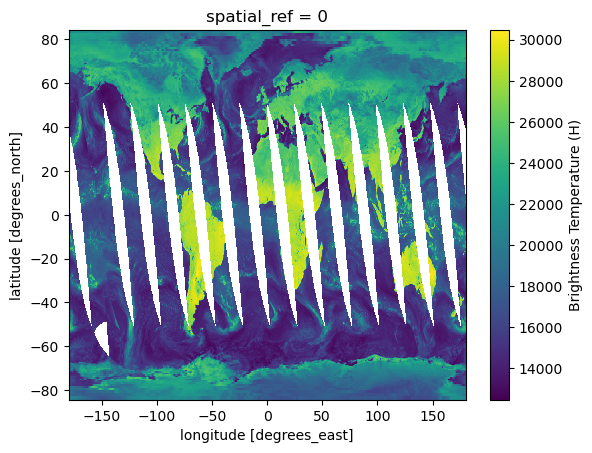

In [289]:
ds.swap_dims({"lon":"x"})["Brightness Temperature (H)"].plot(x ="lon", y="lat")

With all of this we could use either pyproj or rioxarray to reprojet at will

In [276]:
# return to the original format:

# swap lat-y lon-x again
ds = rds.swap_dims(
    {
        "y" : "lat",
        "x" : "lon" 
    }
)
# Reset and/or drop the xy coordinates
ds = ds.reset_coords(names=["x","y"], drop=True)

# We could also remove the spatial ref information if we want to
ds = ds.reset_coords("spatial_ref", drop=True)
ds


<xarray.Dataset>
Dimensions:                     (lon: 1388, lat: 584)
Coordinates:
  * lon                         (lon) float32 -179.9 -179.6 ... 179.6 179.9
  * lat                         (lat) float32 -83.52 -81.98 ... 81.98 83.52
Data variables:
    Brightness Temperature (H)  (lat, lon) float32 nan nan nan ... nan nan nan
    Brightness Temperature (V)  (lat, lon) float32 nan nan nan ... nan nan nan
    Time Information            (lat, lon) float32 nan nan nan ... nan nan nan
Attributes: (12/28)
    CDI:                       Climate Data Interface version 1.9.9 (https://...
    Conventions:               CF-1.6
    ProductName:               AMSR2-L3
    GeophysicalName:           Brightness Temperature (36GHz)
    MeanType:                  DayMean
    Projection:                EQR
    ...                        ...
    OrbitDirection:            Ascending
    PlatformShortName:         GCOM-W1
    SensorShortName:           AMSR2
    ECSDataModel:              B.0
    history:                   Tue Apr 27 13:13:52 2021: cdo remapbil,/media/...
    CDO:                       Climate Data Operators version 1.9.9 (https://...

In [ ]:
# TODO: for some reason, rio.rerpoject sometimes outputs nans in all dvars. look into this conversion from .nc EASEv1 to .nc EASEv2

